In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
from skimage import io, color, transform, feature
import my_measures
import os
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
from skimage import io, color, transform, feature
from skimage.io import imread
from skimage import filters
from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt

C:\Users\rania\Downloads\ML_OPS\themes\image-1.png


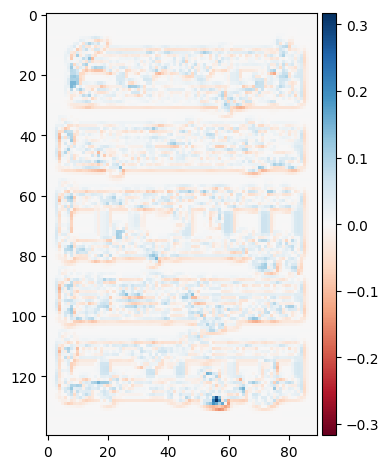

Downscaled image shape:
(140, 90)
Image representation (first row of pixels):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Example of transformation:


In [6]:
import pickle
from basic_pitch.inference import predict
import numpy as np
import warnings
from skimage import io, transform, color, filters
from skimage.filters import roberts, scharr, prewitt, sobel

dims = (140, 90)

def image_manipulation(imname, imview=False):
    warnings.filterwarnings('ignore')
    print(imname)
    img_raw = io.imread(imname)

    # Convert RGBA to RGB
    if img_raw.shape[2] == 4:
        img_raw = color.rgba2rgb(img_raw)

    downscaled = transform.resize(img_raw, (dims[0], dims[1]))  # Downscale image
    gray = filters.sobel(color.rgb2gray(downscaled))
    edge_roberts = roberts(gray)
    edge_scharr = scharr(gray)
    edge_prewitt = prewitt(gray)
    edge_sobel = sobel(gray)
    diff_scharr_sobel = edge_roberts - edge_sobel

    if imview:
        io.imshow(diff_scharr_sobel)
        io.show()

    warnings.filterwarnings('always')
    return diff_scharr_sobel

notation = []

notation.append(image_manipulation("C:\\Users\\rania\\Downloads\\ML_OPS\\themes\\image-1.png"))


# Test the function, look at input/output
test_image = image_manipulation('C:\\Users\\rania\\Downloads\\ML_OPS\\themes\\image-1.png', True)  # Provide relative file name

notation = []

notation.append(image_manipulation("C:\\Users\\rania\\Downloads\\ML_OPS\\themes\\image-1.png"))



In [7]:
notation = []

notation.append(image_manipulation("C:\\Users\\rania\\Downloads\\ML_OPS\\themes\\image-1.png"))

C:\Users\rania\Downloads\ML_OPS\themes\image-1.png


In [8]:
# convert the lists to ndarrays
notation = np.asarray(notation)


# flatten the images ndarray to one row per image
features_flat = notation.reshape((notation.shape[0], -1))

#take a look at your numerical representation of notations
notation

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.72451038e-17,  1.72451038e-17,  1.72451038e-17, ...,
          1.72451038e-17,  1.72451038e-17,  1.72451038e-17],
        ...,
        [ 8.18719389e-17,  8.18719389e-17,  8.18719389e-17, ...,
          8.18719389e-17,  8.18719389e-17,  8.18719389e-17],
        [ 3.68712595e-17,  3.68712595e-17,  3.68712595e-17, ...,
          3.68712595e-17,  3.68712595e-17,  3.68712595e-17],
        [-5.55111512e-17, -5.55111512e-17, -5.55111512e-17, ...,
         -5.55111512e-17, -5.55111512e-17, -5.55111512e-17]]])

In [9]:
features_flat = notation.reshape((notation.shape[0], -1))
import joblib
# Load the trained model
model_path = 'C:\\Users\\rania\\Downloads\\ML_OPS\\Music_clustering_visualization\\kmeans_model.pkl'
loaded_model = joblib.load(model_path)
predictions = loaded_model.predict(features_flat)
predictions

In [11]:
import joblib

# Load the trained model
model_path = 'C:\\Users\\rania\\Downloads\\ML_OPS\\Music_clustering_visualization\\kmeans_model.pkl'
loaded_model = joblib.load(model_path)
predictions = loaded_model.predict(features_flat)
predictions

array([0])